In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

In [3]:
mobile = pd.read_csv('E:\\Python\\New Projects\\22 projects\\12a.mobile price pred\\train.csv')
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile.shape

(2000, 21)

# Preprocessing

In [5]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
mobile.duplicated().sum()

0

In [7]:
#Taking only required columns
mobile_data = mobile.drop(['blue','clock_speed','dual_sim','fc','four_g','m_dep','n_cores','pc','sc_h','sc_w','talk_time',
                           'three_g','touch_screen','wifi'],axis=1)

In [8]:
mobile_data.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram,price_range
0,842,7,188,20,756,2549,1
1,1021,53,136,905,1988,2631,2
2,563,41,145,1263,1716,2603,2
3,615,10,131,1216,1786,2769,2
4,1821,44,141,1208,1212,1411,1


In [9]:
#Checking the data is balanced or not
mobile_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

C:\Users\intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

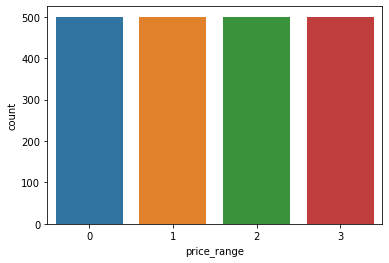

In [10]:
sns.countplot(mobile_data['price_range'])

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

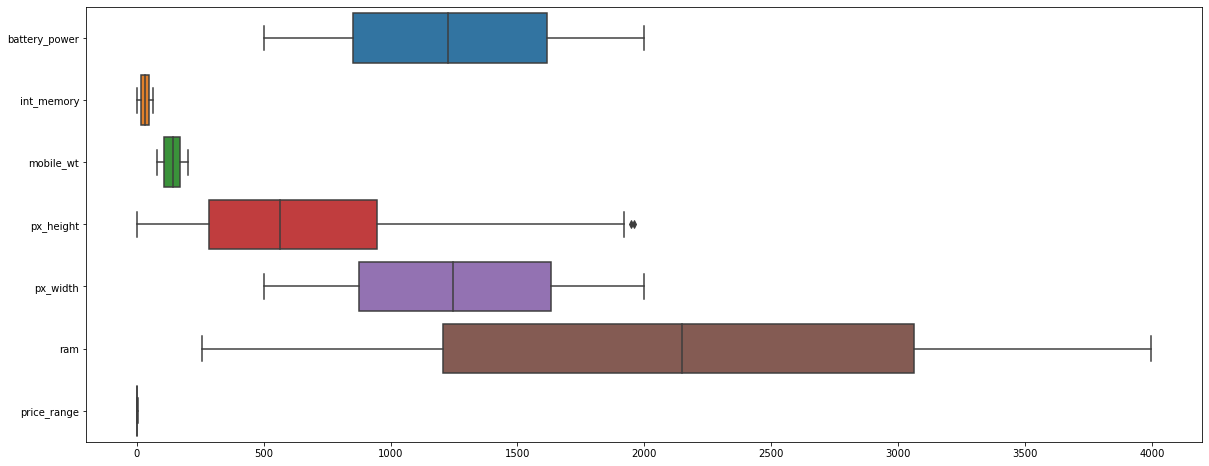

In [11]:
plt.figure(figsize=(20,8))
sns.boxplot(data=mobile_data,orient="h")
plt.xticks(rotation=0)

In [12]:
#Define x and y
x = mobile_data.iloc[:,:6]
y = mobile_data.iloc[:,-1]

In [13]:
y

0       1
1       2
2       2
3       2
4       1
5       1
6       3
7       0
8       0
9       0
10      3
11      3
12      1
13      2
14      0
15      0
16      3
17      3
18      1
19      1
20      3
21      3
22      1
23      0
24      1
25      2
26      3
27      3
28      2
29      0
30      3
31      0
32      1
33      3
34      0
35      1
36      1
37      3
38      2
39      2
40      2
41      3
42      1
43      1
44      0
45      1
46      3
47      1
48      0
49      3
50      2
51      2
52      3
53      1
54      2
55      2
56      0
57      3
58      1
59      2
60      1
61      0
62      0
63      2
64      2
65      3
66      3
67      3
68      0
69      3
70      3
71      2
72      0
73      3
74      0
75      1
76      0
77      0
78      3
79      1
80      3
81      2
82      3
83      1
84      1
85      1
86      0
87      3
88      2
89      2
90      3
91      2
92      0
93      0
94      1
95      3
96      0
97      2
98      0
99      1


In [14]:
#Make train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
#Apply Standard scaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [16]:
X_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
X_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [17]:
X_train_scaled.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
0,-0.205036,-0.120712,0.924567,0.672515,1.533196,0.563241
1,-1.352087,-1.336518,-1.378076,0.390071,1.728604,0.797051
2,-1.677236,1.205621,0.643757,1.259819,0.663162,0.237185
3,0.750088,-1.502310,-1.462319,1.598304,1.128420,1.291157
4,-0.909524,-0.562823,1.598512,0.295923,1.723952,0.945922


# Model Building


# 1.Knn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [28]:
y_pred_knn = knn.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_score = accuracy_score(y_test,y_pred_knn)*100 
train_score = accuracy_score(y_train,knn.predict(X_train_scaled))*100

knn_results = pd.DataFrame(data=[['knn',train_score,test_score]],
                          columns=['Model','Training Accuracy %', 'Testing Accuracy %'])

knn_results

,Model,Training Accuracy %,Testing Accuracy %
0,knn,85.5,80.166667


# 2.Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=5,min_samples_leaf=3)
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)

In [35]:
test_score = accuracy_score(y_test,dtc.predict(X_test_scaled))*100
train_score = accuracy_score(y_train,dtc.predict(X_train_scaled))*100

dtc_results = pd.DataFrame(data=[['Decision',train_score,test_score]],
                                    columns = ['Model','Training Accuracy %', 'Testing Accuracy %'])

dtc_results

,Model,Training Accuracy %,Testing Accuracy %
0,Decision,96.571429,83.666667


# 3.Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [37]:
test_score = accuracy_score(y_test,rfc.predict(X_test_scaled))*100
train_score = accuracy_score(y_train,rfc.predict(X_train_scaled))*100

rfc_results = pd.DataFrame(data=[['Random Forest Classifier',train_score,test_score]],
                                    columns = ['Model','Training Accuracy %', 'Testing Accuracy %'])

rfc_results

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.0,89.666667


In [40]:
# Check Hyper_parameters
from sklearn.model_selection import GridSearchCV
rfc_param_dict = {'criterion':['gini','entropy'],
                 'max_depth':[5,6,7,8,9,10,None],
                 'min_samples_split':[2,3,4,5,6,None],
                 'min_samples_leaf':[2,3,4,5,None]}

grid_rfc = GridSearchCV(rfc,param_grid=rfc_param_dict,cv=10,n_jobs=-1)

In [41]:
grid_rfc.fit(X_train_scaled,y_train)

C:\Users\intel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1400 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\intel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\intel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\intel\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\intel\anaconda3\lib\site-packag

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [2, 3, 4, 5, None],
                         'min_samples_split': [2, 3, 4, 5, 6, None]})

In [42]:
grid_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5)

In [43]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [44]:
grid_rfc.best_score_

0.917142857142857

In [47]:
# Using above parameters 
rfc_grid = RandomForestClassifier(criterion = 'entropy',max_depth = None,min_samples_leaf = 2,min_samples_split = 5)
rfc_grid.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5)

In [48]:
test_score = accuracy_score(y_test,rfc_grid.predict(X_test_scaled))*100
train_score = accuracy_score(y_train,rfc_grid.predict(X_train_scaled))*100

rfc_grid_results = pd.DataFrame(data=[['Random Forest Classifier_Grid',train_score,test_score]],
                                    columns = ['Model','Training Accuracy %', 'Testing Accuracy %'])

rfc_grid_results

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier_Grid,99.785714,91.0


# 4.SVC

In [50]:
from sklearn.svm import SVC
SVC_model = SVC(kernel='rbf',gamma=0.1, C=1,random_state=101)
SVC_model.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.1, random_state=101)

In [51]:
test_score = accuracy_score(y_test,SVC_model.predict(X_test_scaled))*100
train_score = accuracy_score(y_train,SVC_model.predict(X_train_scaled))*100

Svc_results = pd.DataFrame(data=[['SVC',train_score,test_score]],
                                    columns = ['Model','Training Accuracy %', 'Testing Accuracy %'])

Svc_results

,Model,Training Accuracy %,Testing Accuracy %
0,SVC,95.785714,92.833333


In [52]:
Final_results = pd.concat([knn_results,dtc_results,rfc_results,rfc_grid_results,Svc_results],axis=0,ignore_index='bool')

In [53]:
Final_results

,Model,Training Accuracy %,Testing Accuracy %
0,knn,85.500000,80.166667
1,Decision,96.571429,83.666667
2,Random Forest Classifier,100.000000,89.666667
3,Random Forest Classifier_Grid,99.785714,91.000000
4,SVC,95.785714,92.833333


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

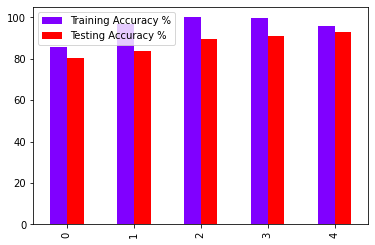

In [54]:
plt.figure(figsize=(20,20))
Final_results.plot.bar(stacked=False,cmap='rainbow')